In [1]:
from classes.reddit_scrapper import RedditScrapper
import pandas as pd
import numpy as np
from numpy import e
from numpy import log
import matplotlib.pyplot as plt

In [2]:
rs = RedditScrapper()
rs.set_current_subreddit('dankmemes')

In [3]:
scores = rs.get_latest_scores()

100%|██████████| 180/180 [00:13<00:00, 13.69it/s]

180 data points have been gathered in runtime so far.



In [4]:
df = rs.get_scoring_data()

100%|██████████| 2/2 [00:05<00:00,  2.51s/it]

182 data points have been gathered in runtime so far.



In [71]:
wanted_cols = ['day', 'author', 'upvotes', 'downvotes', 'upvote_ratio', 'num_comments']
remove_author_none = df['author']!='None'
scoring = df.loc[remove_author_none, wanted_cols]
top_1percent = scoring[scoring['upvotes'] > scoring['upvotes'].quantile(0.99)]
bottom_99 = scoring[scoring['upvotes'] < scoring['upvotes'].quantile(0.99)]
authors = list(set(list(top_1percent['author'])))
lowest_upvotes_in_top = top_1percent['upvotes'].min()
num_memes_in_bottom = (bottom_99.groupby('author')
                                .apply(len)
                                .sort_values(ascending=False))
num_memes_in_top = (top_1percent.groupby('author')
                                .apply(len)
                                .sort_values(ascending=False))
highest_upvotes = top_1percent.groupby('author')['upvotes'].max()
lowest_upvote_ratio = (top_1percent.groupby('author')['upvote_ratio']
                                .apply(min)
                                .sort_values(ascending=False))

In [72]:
lowest_upvote_ratio

author
The_Brogrelord          0.99
mbamoha                 0.99
Witheris                0.99
SwitchingC              0.99
Outlawstarxz            0.99
                        ... 
JasonDonks              0.82
kadebo42                0.81
2Pac_if                 0.79
kayneshaw               0.76
Danny-DevitoTrashMan    0.67
Name: upvote_ratio, Length: 1432, dtype: float64

In [79]:
scores_dict = {}
for author in authors:
    try:
        spammer_index = 1/(num_memes_in_top[author]/num_memes_in_bottom[author])
    except:
        spammer_index = 1/(3*num_memes_in_top[author])
    highest_upvotes_score = log(e+(highest_upvotes[author]/lowest_upvotes_in_top))
    lowest_ratio = lowest_upvote_ratio[author]
    scores_dict[author] = {'spammer_index':spammer_index, 'highest_upvotes_score':highest_upvotes_score, 'lowest_ratio': lowest_ratio, 'score':1/spammer_index * highest_upvotes_score * lowest_ratio}

In [80]:
num_memes_in_bottom_filled = []
for author in authors:
    try: num_memes_in_bottom_filled.append(num_memes_in_bottom[author])
    except: num_memes_in_bottom_filled.append(0)

score = pd.DataFrame({'author': authors, 'num_memes_in_bottom': num_memes_in_bottom_filled, 'num_memes_in_top': [num_memes_in_top[author] for author in authors], 'highest_upvotes': [highest_upvotes[author] for author in authors], 'final_score': ((50/(2.2*stdev(log([scores_dict[author]['score'] for author in authors]))))*log([scores_dict[author]['score'] for author in authors])+50), 'score': [scores_dict[author]['score'] for author in authors], 'spammer_index': [scores_dict[author]['spammer_index'] for author in authors], 'lowest_ratio': [scores_dict[author]['lowest_ratio'] for author in authors], 'highest_upvotes_score': [scores_dict[author]['highest_upvotes_score'] for author in authors]}).sort_values('score', ascending=False)

In [81]:
score

,author,num_memes_in_bottom,num_memes_in_top,highest_upvotes,final_score,score,spammer_index,lowest_ratio,highest_upvotes_score
1013,JKdoe,0,4,64747,97.740835,21.406255,0.083333,0.93,1.918123
229,George2110,1,8,71342,91.558941,14.396298,0.125000,0.91,1.977514
1037,poppy38,0,2,44735,85.341403,9.659788,0.166667,0.94,1.712728
901,Deeney42,0,2,38010,85.088250,9.504126,0.166667,0.97,1.633011
14,2Pac_if,2,10,125679,84.827782,9.346584,0.200000,0.79,2.366224
...,...,...,...,...,...,...,...,...,...
1217,SuperSahil10,68,1,24027,-10.994751,0.019956,68.000000,0.94,1.443619
511,Syk3s_2342,74,1,28019,-11.372329,0.019478,74.000000,0.96,1.501444
662,huffpuffington,75,1,19698,-12.769511,0.017808,75.000000,0.97,1.376888
1188,blablatoyou,99,1,31277,-15.449289,0.014994,99.000000,0.96,1.546277


(array([ 18.,  54., 162., 232., 246., 161., 220., 279.,  58.,   2.]),
 array([-16.0547156 ,  -4.67516054,   6.70439451,  18.08394957,
         29.46350463,  40.84305968,  52.22261474,  63.6021698 ,
         74.98172486,  86.36127991,  97.74083497]),
 <a list of 10 Patch objects>)

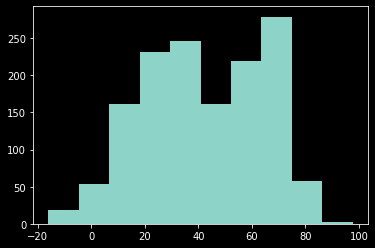

In [63]:
from statistics import stdev
plt.hist((50/(2.2*stdev(log([scores_dict[author]['score'] for author in authors]))))*log([scores_dict[author]['score'] for author in authors])+50)

In [43]:
from statistics import stdev
plt.hist((50/(2.2*stdev(log(score['score']))))*log(score['score'])+50)

3456602},
 'Vito_wolfy': {'part1': 0.16666666666666666,
  'part2': 1.677961278035735,
  'score': 0.2796602130059558},
 'HmmmOk_': {'part1': 0.25,
  'part2': 1.3592455641452748,
  'score': 0.3398113910363187},
 'DaWeed_3057': {'part1': 0.25,
  'part2': 1.5200997777377403,
  'score': 0.3800249444344351},
 'gougboy': {'part1': 0.07692307692307693,
  'part2': 1.6323200819774357,
  'score': 0.12556308322903353},
 'kent64': {'part1': 0.11764705882352941,
  'part2': 1.5356706690643038,
  'score': 0.1806671375369769},
 'Riko_Vladimir_Jr': {'part1': 0.1111111111111111,
  'part2': 1.5152114934397496,
  'score': 0.1683568326044166},
 'frigingayfrogs': {'part1': 1.0,
  'part2': 1.8464859350275074,
  'score': 1.8464859350275074},
 'csizzles': {'part1': 1.0,
  'part2': 1.4354592415291954,
  'score': 1.4354592415291954},
 'Jimbobama04': {'part1': 0.2857142857142857,
  'part2': 1.413203373499462,
  'score': 0.40377239242841767},
 'CarlWhatHaveYouDone': {'part1': 3,
  'part2': 1.4239979053942895,
  'sc